### Setup

This notebook explains how to to access the dataset models from django.
The datasets are loaded from the Postgres database into pandas dataframes.

To start the notebook server:

```
# Start a bash shell inside the api container
docker-compose exec api /bin/bash

# Start the jupyter notebook
python manage.py shell_plus --notebook

# Take note of the token provided and access the notebook through:
<ip-of-the-machine>:7777/?<token>
http://127.0.0.1:7777/?token=30c43675981e671b4a609cff470819098e274bbde415b7f5
```

This step has only to be made once as long as the jupyter-notebook keeps executing.
Considering that the the notebook continues to run, you can access the notebook using:
``` 
<ip-of-the-machine>:7777/?<token>
```

In [1]:
# Required to access the database
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# Data analysis tools
import pandas as pd
import numpy as np
import seaborn as sns

# Models available in our application
from datasets.models import RawFlower, RawUNM, RawDAR
from django.contrib.auth.models import User

In [2]:
from api import adapters
from api import analysis

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
from datasets.models import RawNEU
df = pd.DataFrame.from_records(
        RawNEU.objects.
        # exclude(Creat_Corr_Result__lt=-1000).
        # exclude(Creat_Corr_Result__isnull=True).
        values()
    )


#adapters.neu.get_dataframe()

# Get Dataframes

In [4]:
##commented out for testing purposes
neu_df = adapters.neu.get_dataframe()
unm_df = adapters.unm.get_dataframe()

#just for testing the size, we generate some random data
generate_randoms= ['UPB', 'UPT', 'USB', 'USE', 'USN', 'UTAS', 'UTL', 'UTU', 'UUR', 'UVA',
       'UZN'] + ['UHG', 'UBA', 'UCO', 'UCS', 'UBE', 'UCD', 'UMO', 'UMN']

#numpy has random number generators which are pretty good
for analyte in generate_randoms:
    unm_df[analyte] = np.random.exponential(scale = 1.0, size = unm_df.shape[0])

##DELETE once have real dar data
dar_df=unm_df

##UNCOMMENT once have real dar data
"""df3 = adapters.dar.get_dataframe()"""


(570, 50)
(543, 10)
Model out 543. afterocnf 543. check ids 543
<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 542
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PIN_Patient         543 non-null    object 
 1   original            543 non-null    float64
 2   prediction          543 non-null    float64
 3   prediction_xvalue   543 non-null    float64
 4   original_xvalue     543 non-null    float64
 5   SPECIFICGRAVITY_V2  543 non-null    float64
 6   zscore              543 non-null    float64
 7   UDR                 543 non-null    float64
 8   Cohort              543 non-null    object 
 9   dil_indicator       543 non-null    int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 46.7+ KB
None
                    count      mean       std       min       25%       50%  \
original            543.0 -0.010786  1.007769 -2.651547 -0.707231  0.102901   
prediction       

'df3 = adapters.dar.get_dataframe()'

In [5]:


#plt.plot(np.random.exponential(scale=1.0, size=200))

In [6]:
neu_df.columns


Index(['PIN_Patient', 'TimePeriod', 'Member_c', 'Outcome', 'Outcome_weeks',
       'age', 'ethnicity', 'race', 'BMI', 'smoking', 'parity',
       'preg_complications', 'folic_acid_supp', 'fish', 'babySex', 'birthWt',
       'birthLen', 'headCirc', 'WeightCentile', 'LGA', 'SGA', 'ga_collection',
       'education', 'birth_year', 'SPECIFICGRAVITY_V2_x', 'fish_pu_v2', 'UBA',
       'UBE', 'UCD', 'UCO', 'UCR', 'UCS', 'UCU', 'UHG', 'UMN', 'UMO', 'UNI',
       'UPB', 'UPT', 'USB', 'USE', 'USN', 'UTAS', 'UTL', 'UTU', 'UUR', 'UVA',
       'UZN', 'CohortType', 'original', 'prediction', 'prediction_xvalue',
       'original_xvalue', 'SPECIFICGRAVITY_V2_y', 'zscore', 'UDR', 'Cohort',
       'dil_indicator'],
      dtype='object')

In [7]:
generate_randoms= ['UPB', 'UPT', 'USB', 'USE', 'USN', 'UTAS', 'UTL', 'UTU', 'UUR', 'UVA',
       'UZN'] + ['UHG', 'UBA', 'UCO', 'UCS', 'UBE', 'UCD', 'UMO', 'UMN']

for analyte in generate_randoms:
    unm_df[analyte] = np.random.exponential(scale = 1.0, size = unm_df.shape[0])

In [8]:
unm_df.columns

Index(['PIN_Patient', 'TimePeriod', 'Member_c', 'Outcome', 'Outcome_weeks',
       'age', 'ethnicity', 'race', 'education', 'BMI', 'income', 'smoking',
       'parity', 'preg_complications', 'folic_acid_supp', 'fish', 'babySex',
       'birthWt', 'headCirc', 'birthLen', 'WeightCentile', 'LGA', 'SGA',
       'ga_collection', 'creatininemgdl_x', 'birth_year', 'UAS3', 'UAS5',
       'UASB', 'UASC', 'UDMA', 'UMMA', 'UPB', 'UTAS', 'CohortType', 'original',
       'prediction', 'prediction_xvalue', 'original_xvalue',
       'creatininemgdl_y', 'zscore', 'UDR', 'Cohort', 'dil_indicator', 'UPT',
       'USB', 'USE', 'USN', 'UTL', 'UTU', 'UUR', 'UVA', 'UZN', 'UHG', 'UBA',
       'UCO', 'UCS', 'UBE', 'UCD', 'UMO', 'UMN'],
      dtype='object')

### Find Common Variables Across 3 Cohorts

In [9]:
##returns list of biometric samples column names present in df 
list_notin=['PIN_Patient', 'TimePeriod', 'Member_c', 'Outcome', 'Outcome_weeks',
       'age', 'ethnicity', 'race', 'education', 'BMI', 'income', 'smoking',
       'parity', 'preg_complications', 'folic_acid_supp', 'fish', 'babySex',
       'birthWt', 'headCirc', 'birthLen', 'WeightCentile', 'LGA', 'SGA',
       'ga_collection', 'creatininemgdl_x', 'birth_year', 'CohortType', 'original',
       'prediction', 'prediction_xvalue', 'original_xvalue',
       'creatininemgdl_y', 'zscore', 'Cohort', 'dil_indicator', ]
def cat_samples_list(df):
    samples=[]
    for col in df.columns:
        if col not in list_notin:
            samples.append(col)
    return samples
neu_cat_list=cat_samples_list(neu_df)
len(neu_cat_list)

26

In [10]:
unm_cat_list=cat_samples_list(unm_df)
len(unm_cat_list)

26

In [11]:
dar_cat_list=cat_samples_list(dar_df)
len(dar_cat_list)

26

In [12]:
cohs2=set.intersection(set(neu_cat_list), set(unm_cat_list))

In [13]:
intersec_3_cohs_list=list(set.intersection(set(cohs2), set(dar_cat_list)))

In [14]:
len(intersec_3_cohs_list)

20

### Creating a DF with intersected features

##### Can you also rewrite the function to see what is harmonized across two cohorts?


In [15]:
if 'PIN_Patient' not in intersec_3_cohs_list:
    intersec_3_cohs_list.insert(0,"PIN_Patient")
if 'CohortType' not in intersec_3_cohs_list:
    intersec_3_cohs_list.insert(0,"CohortType")
 
print("Cohort(s) : Total Data Size (for interescted features)")

neu_intersected_cols=neu_df[intersec_3_cohs_list]
neu_intersected_cols["CohortType"]="NEU"
neu_size=neu_intersected_cols.shape[0]
print("NEU : " +format(neu_size, "0.0f"))


unm_intersected_cols=unm_df[intersec_3_cohs_list]
unm_intersected_cols["CohortType"]="UNM"
unm_size=unm_intersected_cols.shape[0]
print("UNM : " + format(unm_size,"0.0f"))

dar_intersected_cols=dar_df[intersec_3_cohs_list]
dar_intersected_cols["CohortType"]="DAR"
dar_size=dar_intersected_cols.shape[0]
print("DAR : " + format(unm_size,"0.0f"))



Cohort(s) : Total Data Size (for interescted features)
NEU : 570
UNM : 59
DAR : 59


/tmp/ipykernel_216/2078423951.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neu_intersected_cols["CohortType"]="NEU"
/tmp/ipykernel_216/2078423951.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unm_intersected_cols["CohortType"]="UNM"
/tmp/ipykernel_216/2078423951.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [16]:
intersec_3_cohs_list

['CohortType',
 'PIN_Patient',
 'UPB',
 'UCD',
 'USN',
 'UTL',
 'UBE',
 'UDR',
 'UBA',
 'UVA',
 'UHG',
 'USE',
 'UPT',
 'UTU',
 'UTAS',
 'UUR',
 'UCO',
 'UMO',
 'UZN',
 'UCS',
 'UMN',
 'USB']

In [17]:
##JAG: if time, make it write more readably to csv

# 1) TODO: Generate this for the individual datasets and combinations
neu_df[intersec_3_cohs_list].describe().transpose()

##truncates column values
def clean_cols(DF_desc):
    DF_desc["count"]=DF_desc["count"].astype(int)
    DF_desc["mean"]=round(DF_desc["mean"],2)
    DF_desc["std"]=round(DF_desc["std"],2)
    DF_desc["min"]=round(DF_desc["min"],2)
    DF_desc["25%"]=round(DF_desc["25%"],2)
    DF_desc["50%"]=round(DF_desc["50%"],2)
    DF_desc["75%"]=round(DF_desc["75%"],2)
    DF_desc["max"]=round(DF_desc["max"],2)



# NEU
NEU_desc=neu_df[intersec_3_cohs_list].describe().transpose()
clean_cols(NEU_desc)

# DAR - dummy
DAR_desc=dar_df[intersec_3_cohs_list].describe().transpose()
clean_cols(DAR_desc)

# UNM
UNM_desc=unm_df[intersec_3_cohs_list].describe().transpose()
clean_cols(UNM_desc)

# Write functions that will iterate and save each summary dataframe to a csv file.
frames_names = [(NEU_desc,"NEU"), (DAR_desc, "DAR"),(UNM_desc,"UNM")]

file_name = "Summary_Stats_Julia_Study"


try:
    f = open(file_name+".csv", "x")
    f = open(file_name+".csv", "a")
    
except:
    f = open(file_name+".csv", "a")
    
for tup in frames_names:
    frame=tup[0]
    name=tup[1]
    ##content=string(name ,"/n",frame,"\n\n")
    f.write(name)
    f.write("\n\t")
    f.write(str(frame))
    f.write("\n\n")

f.close()

frames_names

[(      count    mean     std   min     25%     50%     75%      max
  UPB     570    0.34    0.42  0.00    0.07    0.21    0.41     2.93
  UCD     570    0.21    0.33  0.00    0.05    0.12    0.21     3.46
  USN     570    4.15   12.38  0.11    0.78    1.52    3.11   168.72
  UTL     570    0.17    0.15  0.00    0.14    0.14    0.22     2.60
  UBE     570    0.05    0.10  0.00    0.03    0.03    0.04     1.86
  UDR     543    1.00    0.34  0.11    0.79    1.02    1.23     1.94
  UBA     570    4.34    7.94  0.07    1.24    2.66    5.05   157.23
  UVA     570    0.36    0.17  0.00    0.42    0.42    0.42     2.32
  UHG     566    0.95    1.29  0.00    0.28    0.60    1.19    17.99
  USE     136   43.67   29.23  4.65   23.66   41.45   54.20   208.82
  UPT     570    0.05    0.13  0.00    0.04    0.04    0.04     2.66
  UTU     570    0.21    0.23  0.00    0.14    0.14    0.24     3.92
  UTAS    570   14.96   26.21  0.70    5.40    9.39   16.41   466.03
  UUR     570    0.02    0.07  0.0

In [18]:
#2) TODO: Create a report of the counts per analyte provided by each cohort
# plot the counts using a this using a histogram

##build dictionary with values coressponding to each column
vals={}
for col in intersec_3_cohs_list:
    if col=="PIN_Patient":
        None
    else:
        vals[col]=[]

##report ocunts for each data frame and add values to dictionary
for tup in frames_names:
    i=0
    name=tup[1]
    print('\033[1m'+name+'\033[0m')
    vals["CohortType"].append(name)

    while i<len(tup[0]):
        feature=tup[0].index[i]
        feature_count=tup[0]["count"][i]
        print("   "+feature+": "+format(feature_count,"0.0f"))
        i=i+1
        vals[feature].append(feature_count)


        ##=tup[0]["count"][i]
##create dataframe fro values in dictionary
counts=pd.DataFrame(columns=list(vals.keys()), data=vals)
counts



NEU
   UPB: 570
   UCD: 570
   USN: 570
   UTL: 570
   UBE: 570
   UDR: 543
   UBA: 570
   UVA: 570
   UHG: 566
   USE: 136
   UPT: 570
   UTU: 570
   UTAS: 570
   UUR: 570
   UCO: 570
   UMO: 570
   UZN: 570
   UCS: 570
   UMN: 570
   USB: 570
DAR
   UPB: 59
   UCD: 59
   USN: 59
   UTL: 59
   UBE: 59
   UDR: 59
   UBA: 59
   UVA: 59
   UHG: 59
   USE: 59
   UPT: 59
   UTU: 59
   UTAS: 59
   UUR: 59
   UCO: 59
   UMO: 59
   UZN: 59
   UCS: 59
   UMN: 59
   USB: 59
UNM
   UPB: 59
   UCD: 59
   USN: 59
   UTL: 59
   UBE: 59
   UDR: 59
   UBA: 59
   UVA: 59
   UHG: 59
   USE: 59
   UPT: 59
   UTU: 59
   UTAS: 59
   UUR: 59
   UCO: 59
   UMO: 59
   UZN: 59
   UCS: 59
   UMN: 59
   USB: 59


,CohortType,UPB,UCD,USN,UTL,UBE,UDR,UBA,UVA,UHG,...,UPT,UTU,UTAS,UUR,UCO,UMO,UZN,UCS,UMN,USB
0,NEU,570,570,570,570,570,543,570,570,566,...,570,570,570,570,570,570,570,570,570,570
1,DAR,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
2,UNM,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59


In [19]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
# cool feature for data frames if you want to make the dataframe also show a gradient
counts_df=counts.style.background_gradient(cmap=cm)
counts_df

,CohortType,UPB,UCD,USN,UTL,UBE,UDR,UBA,UVA,UHG,USE,UPT,UTU,UTAS,UUR,UCO,UMO,UZN,UCS,UMN,USB
0,NEU,570,570,570,570,570,543,570,570,566,136,570,570,570,570,570,570,570,570,570,570
1,DAR,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
2,UNM,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59


In [20]:
pip install dataframe-image

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
!apt install chromium-chromedriver

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [22]:
##save above df as png
import pandas as pd
import dataframe_image as dfi
 
df = pd.DataFrame({'A': [1,2,3,4],
                   'B':['A','B','C','D']})
 
dfi.export(df, 'dataframe.png', table_conversion = 'chrome')

OSError: Chrome executable not able to be found on your machine

### Matplotlib histogram 


### Seaborn histogram - finalized

Advantages
- Clean
- Simple
- Don't manually add features

Disadvantages

...

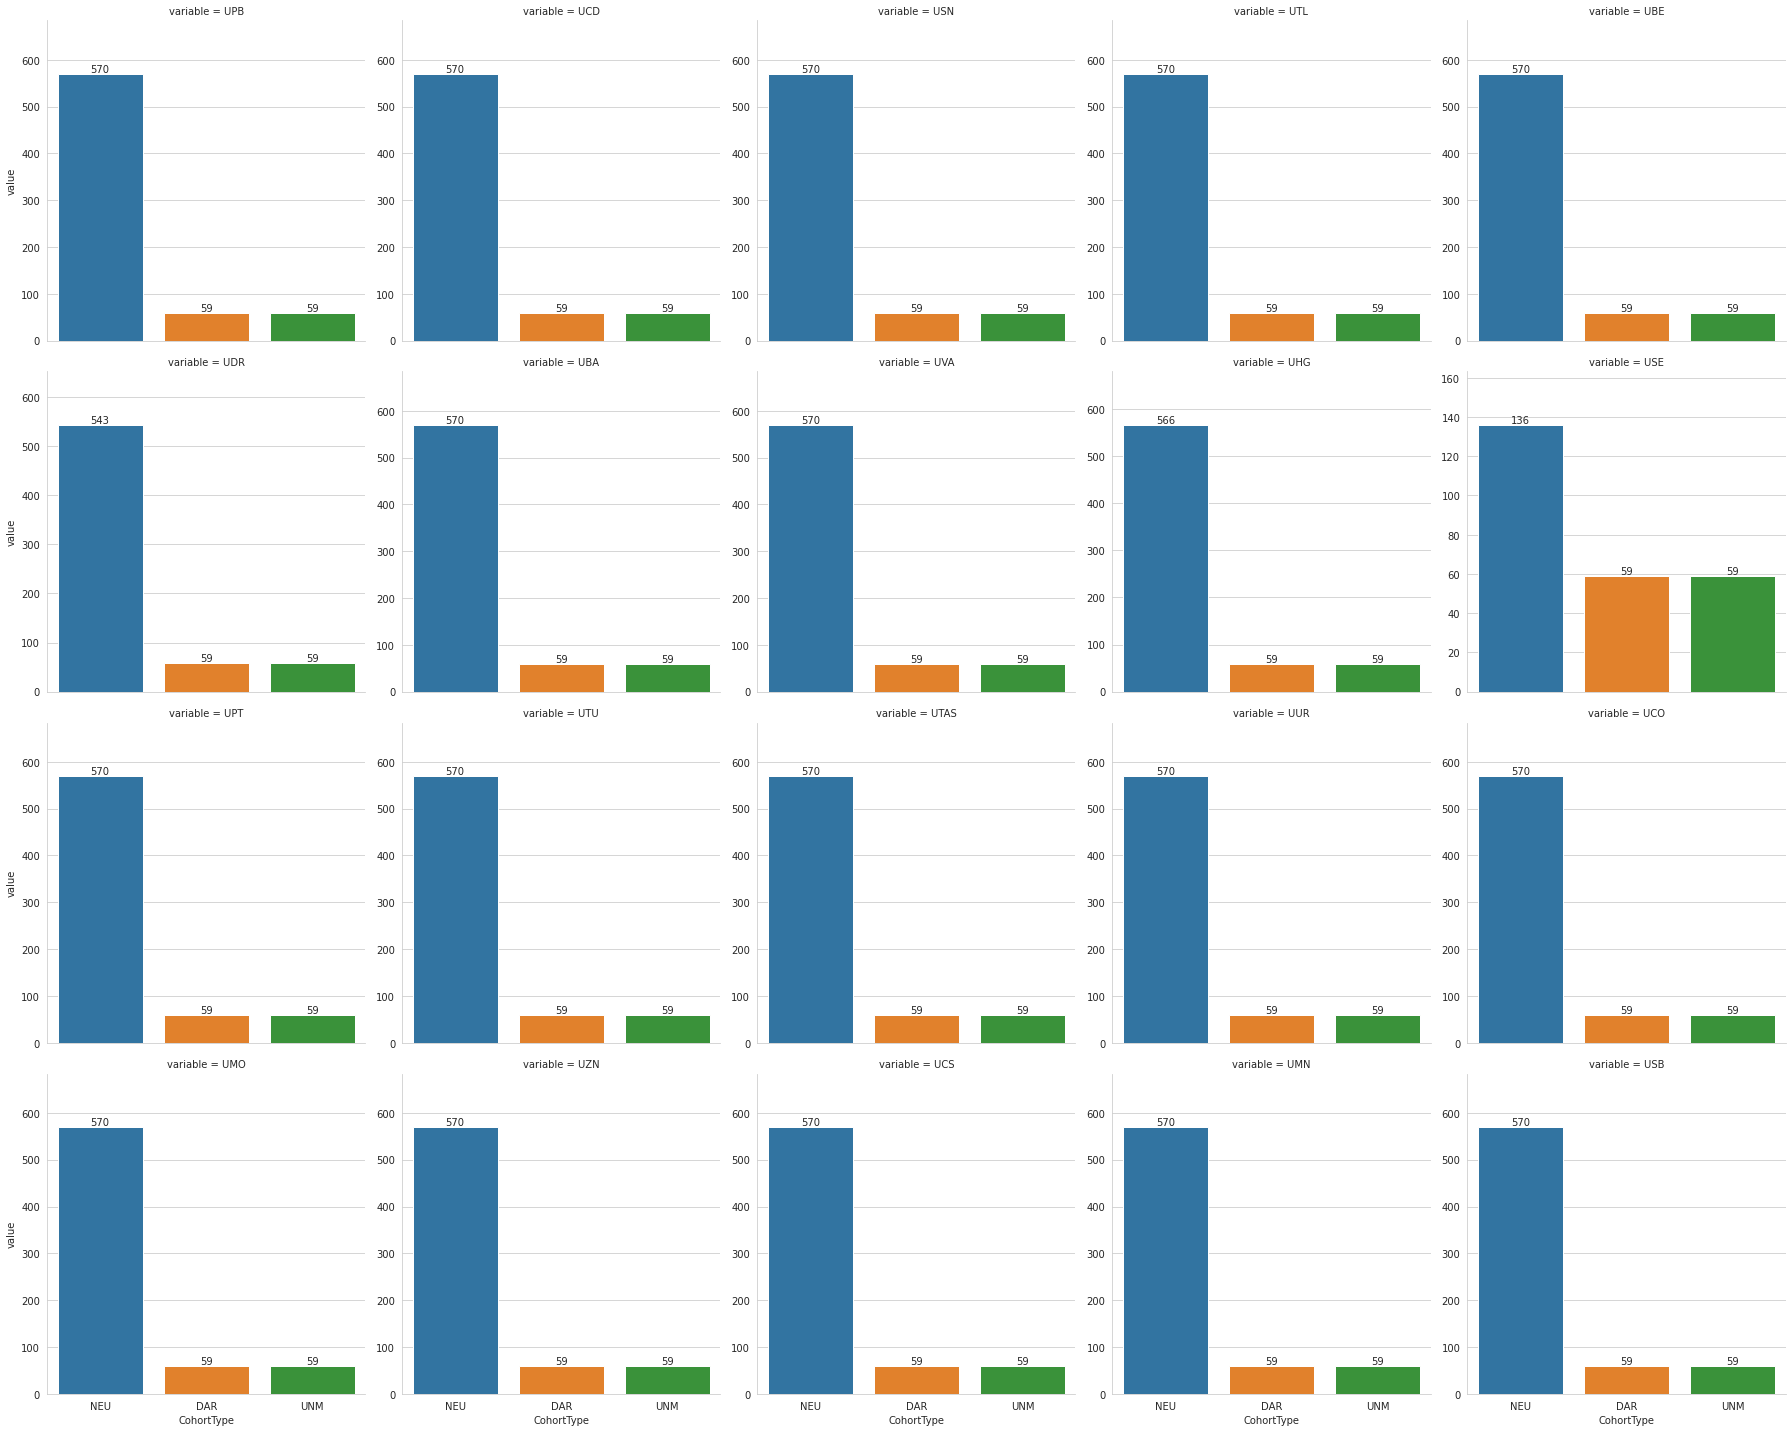

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
counts_melted=pd.melt(counts, id_vars = ['CohortType'])


g = sns.catplot(
    data=counts_melted,
    x='CohortType', y='value',
    col='variable', kind='bar', col_wrap=5, sharey = False
)

##JAG TODO understand what is happening here
# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)


In [23]:
# 3) TODO: Generate boxplot data to visualize individual and combinations of data

import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

##creating dataframe - need to melt eaach combination of df, and then put them into one df
##for below boxplot

neu_ints_melt = pd.melt(neu_intersected_cols.drop('PIN_Patient', axis = 1), id_vars="CohortType")
unm_ints_melt = pd.melt(unm_intersected_cols.drop('PIN_Patient', axis = 1), id_vars="CohortType")
dar_ints_melt=pd.melt(dar_intersected_cols.drop('PIN_Patient', axis = 1), id_vars="CohortType")


all_combined_stacks_melts=pd.concat([neu_ints_melt,unm_ints_melt,dar_ints_melt], axis=0)

print("Checking that melted df has same correct number of values per cohorts")
print("Cohort values: ", all_combined_stacks_melts["CohortType"].unique())
print(all_combined_stacks_melts[all_combined_stacks_melts["CohortType"]=="NEU"].count()[0],"=", neu_size*(len(intersec_3_cohs_list)-2))
print(all_combined_stacks_melts[all_combined_stacks_melts["CohortType"]=="DAR"].count()[0],"=", dar_size*(len(intersec_3_cohs_list)-2))
print(all_combined_stacks_melts[all_combined_stacks_melts["CohortType"]=="UNM"].count()[0],"=", unm_size*(len(intersec_3_cohs_list)-2))
                                                                                                                            

Checking that melted df has same correct number of values per cohorts
Cohort values:  ['NEU' 'UNM' 'DAR']
11400 = 11400
1180 = 1180
1180 = 1180


In [24]:
all_combined_stacks_melts


,CohortType,variable,value
0,NEU,UPB,0.996000
1,NEU,UPB,0.736000
2,NEU,UPB,0.199000
3,NEU,UPB,0.928000
4,NEU,UPB,0.623000
...,...,...,...
1175,DAR,USB,1.805049
1176,DAR,USB,1.833188
1177,DAR,USB,0.993649
1178,DAR,USB,0.453174


In [25]:
all_combined_stacks_melts[all_combined_stacks_melts['CohortType'].isin(['NEU','UNM','DAR'])]

,CohortType,variable,value
0,NEU,UPB,0.996000
1,NEU,UPB,0.736000
2,NEU,UPB,0.199000
3,NEU,UPB,0.928000
4,NEU,UPB,0.623000
...,...,...,...
1175,DAR,USB,1.805049
1176,DAR,USB,1.833188
1177,DAR,USB,0.993649
1178,DAR,USB,0.453174


"\nfor ax in g.axes.ravel():\n    \n    # add annotations\n    for c in ax.containers:\n        labels = [f'{(v.get_height()):.0f}' for v in c]\n        ax.bar_label(c, labels=labels, label_type='edge')\n    ax.margins(y=0.2)"

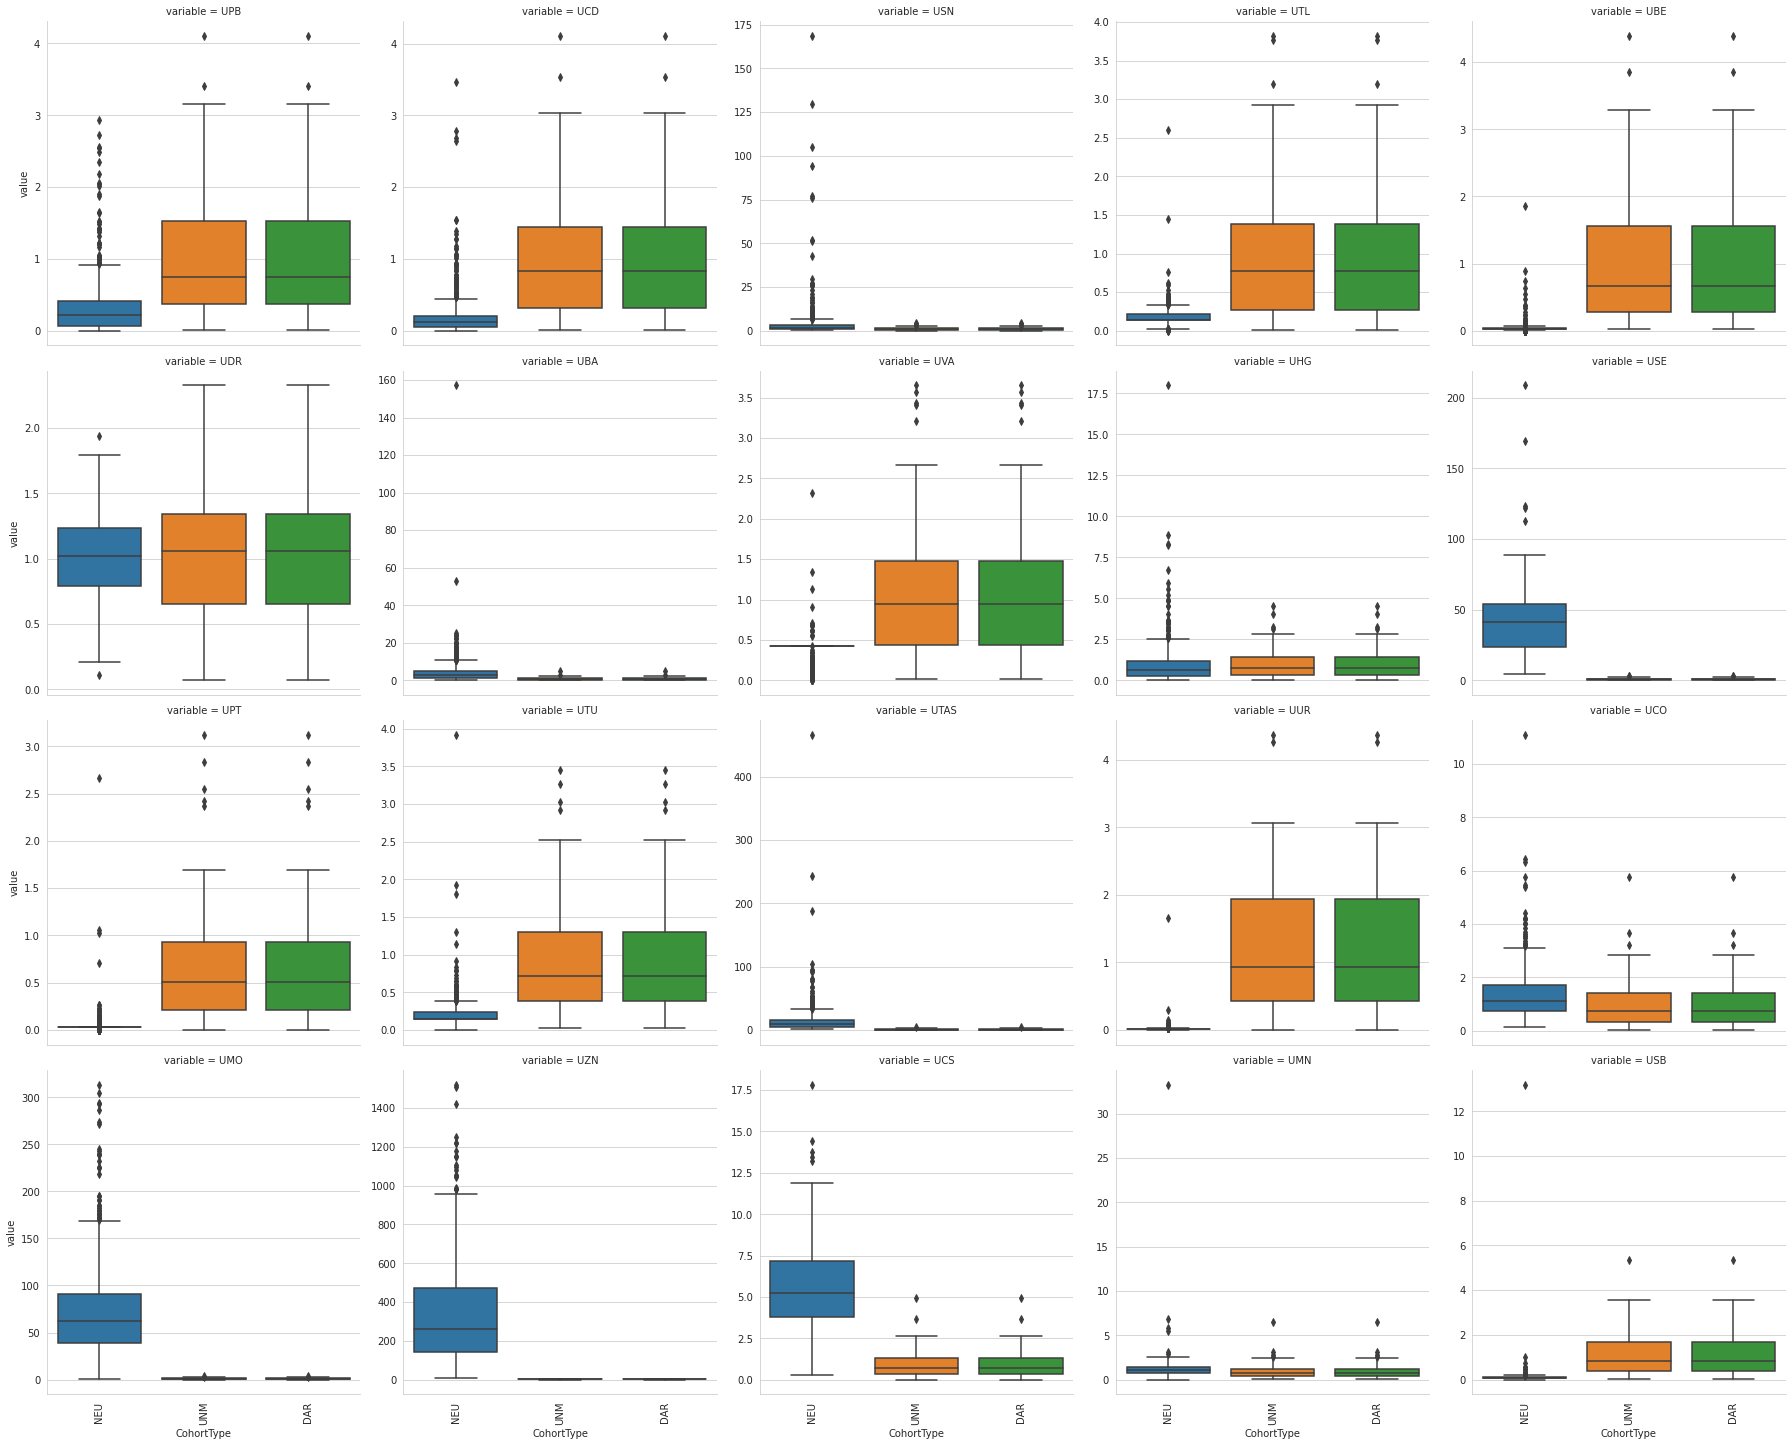

In [44]:
sns.set_style('whitegrid')

plot_df = all_combined_stacks_melts[all_combined_stacks_melts['CohortType'].isin(['NEU','UNM','DAR'])]
g = sns.catplot(
    data=plot_df,
    x='CohortType', y='value',
    col='variable', kind='box', col_wrap=5, sharey = False,
)

# set rotation
g.set_xticklabels(rotation=90)

##JAG TO DO add number of data points above each box

# Calculate number of obs per group & median to position labels


for ax in g.axes.ravel():
    for c in ax.containers:
        medians = plot_df.groupby(['CohortType', 'variable'])['value'].median().values
        nobs = plot_df['value'].value_counts().values
        nobs = [str(x) for x in nobs.tolist()]
        nobs = ["n: " + i for i in nobs]

        # Add it to the plot
        pos = range(len(nobs))
        for tick,label in zip(pos,ax.get_xticklabels()):
            ax.text(pos[tick],
                    medians[tick] + 0.03,
                    nobs[tick],
                    horizontalalignment='center',
                    size='x-small',
                    color='w',
                    weight='semibold')
"""
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)"""

    




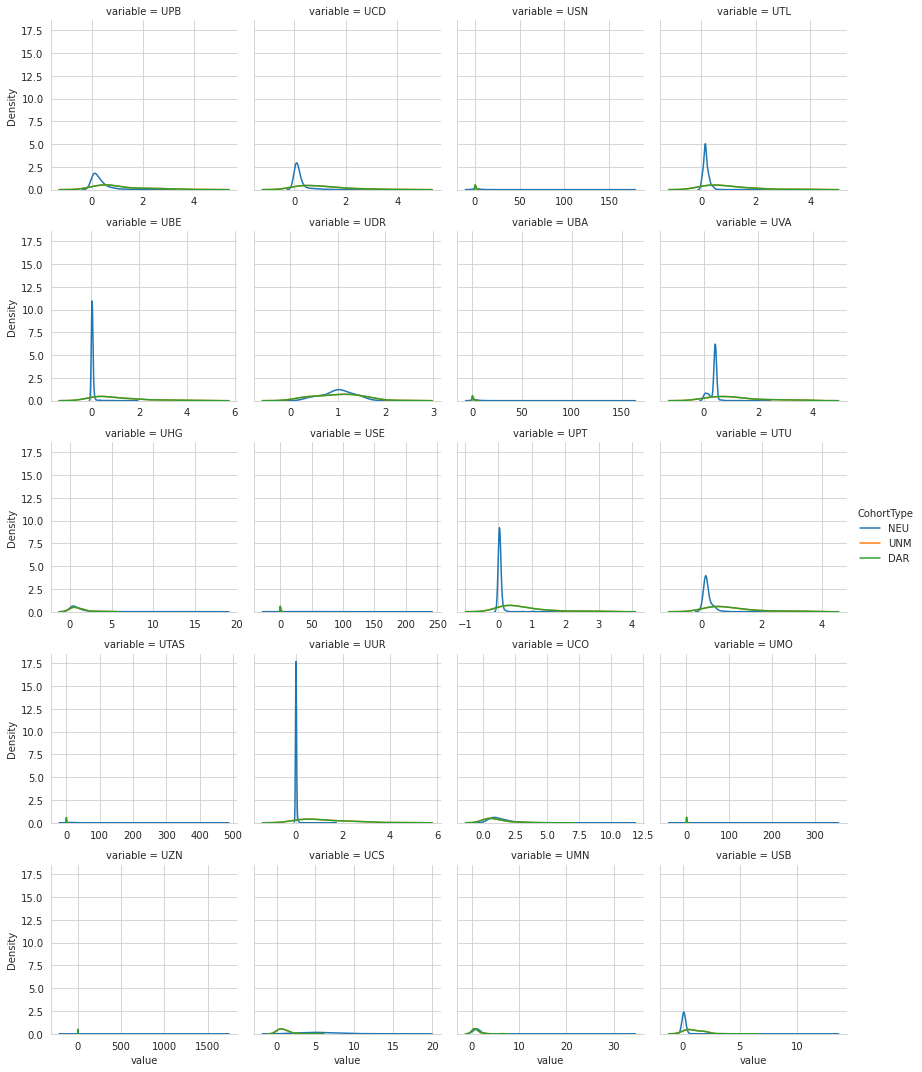

In [27]:
# 4) TODO: Generate a visualization also where you overlay the three density plots for each cohort over each other
# If you can add vertical lines in the distribution plot to show the mean.

g = sns.FacetGrid(plot_df, col='variable', hue='CohortType', col_wrap = 4, sharex = False)
p1 = g.map(sns.kdeplot, 'value').add_legend()


#example:
#https://stackoverflow.com/questions/41144357/showing-the-mean-line-in-a-density-plot-in-pandas

In [50]:
unm_df.columns

Index(['PIN_Patient', 'TimePeriod', 'Member_c', 'Outcome', 'Outcome_weeks',
       'age', 'ethnicity', 'race', 'education', 'BMI', 'income', 'smoking',
       'parity', 'preg_complications', 'folic_acid_supp', 'fish', 'babySex',
       'birthWt', 'headCirc', 'birthLen', 'WeightCentile', 'LGA', 'SGA',
       'ga_collection', 'creatininemgdl_x', 'birth_year', 'UAS3', 'UAS5',
       'UASB', 'UASC', 'UDMA', 'UMMA', 'UPB', 'UTAS', 'CohortType', 'original',
       'prediction', 'prediction_xvalue', 'original_xvalue',
       'creatininemgdl_y', 'zscore', 'UDR', 'Cohort', 'dil_indicator', 'UPT',
       'USB', 'USE', 'USN', 'UTL', 'UTU', 'UUR', 'UVA', 'UZN', 'UHG', 'UBA',
       'UCO', 'UCS', 'UBE', 'UCD', 'UMO', 'UMN'],
      dtype='object')

In [ ]:
# 5) TODO: Correlate the 15 harmonized urine values but write your own correlation functions and visualizaions. 
##heatmap of correlation in each cohort 
import seaborn as sns
# Generate correlations for datasets:
# NEU
# DAR
# UNM

import numpy as np; np.random.seed(0)
import seaborn as sns



fig, ax =plt.subplots(1,2)

ax = sns.heatmap(neu_df[intersec_3_cohs_list].corr())
ax = sns.heatmap(unm_df[intersec_3_cohs_list].corr())



In [ ]:

# 6) TODO: Can you write about what you see. Are there any cohorts that are similar with the harmonized data? 
# Are there any analytes that are particularliy higher lower in specific cohorts.


### 7) TODO: Think about if how we could compare similarity between two cohorts?

- Look at the shape of the distributions
- Look at peak of distributions (mode)
- Look at median and compare to dashed line (mean)


### NHANES Data


In [76]:
### 7) TODO: Think about if how we could compare similarity between two cohorts?
CAT_DAR_ANALYTES = [('Analytes', (
    # Analyate acronym and name,                    Mapping in the dar DB
    ('UAG', ' Silver - Urine'),                     # Ag in ug/L
    ('UAL', ' Aluminium - Urine'),                  # Al in ug/L
    ('UCR',  'Chromium - Urine'),                   # Cr in ug/L
    ('UCU',  'Copper - Urine'),                     # Cu in ug/L
    ('UFE',  'Iron - Urine'),                       # Fe in ug/L
    ('UNI',  'Niquel - Urine'),                     # Ni in ug/L
    ('UVA',  'Vanadium - Urine'),                   # V in ug/L
    ('UZN',  'Zinc - Urine'),                       # Zn in ug/L
    # ('BCD',  'Cadmium - Blood'),
    # ('BHGE', 'Ethyl Mercury - Blood'),
    # ('BHGM', 'Methyl Mercury - Blood'),
    # ('BMN',  'Manganese - Blood'),
    # ('BPB',  'Lead - Blood'),
    # ('BSE',  'Selenium - Blood'),
    # ('IHG',  'Inorganic Mercury - Blood'),
    # ('THG',  'Mercury Total - Blood'),
    # ('SCU',  'Copper - Serum'),
    # ('SSE',  'Selenium - Serum'),
    # ('SZN',  'Zinc - Serum'),
    ('UAS3', 'Arsenous (III) acid - Urine'),        # As in ug/L
    # ('UAS5', 'Arsenic (V) acid - Urine'),
    ('UASB', 'Arsenobetaine - Urine'),              # AsB in ug/L
    # ('UASC', 'Arsenocholine - Urine'),
    ('UBA',  'Barium - Urine'),                     # Ba in ug/L
    ('UBE',  'Beryllium - Urine'),                  # Be in ug/L
    ('UCD',  'Cadmium - Urine'),                    # Cd in ug/L
    ('UCO',  'Cobalt - Urine'),                     # Co in ug/L
    ('UCS',  'Cesium - Urine'),                     # Cs in ug/L
    ('UDMA', 'Dimethylarsinic Acid - Urine'),       # DMA in ug/L
    ('UHG',  'Mercury - Urine'),                    # Hg in ug/L
    # ('UIO',  'Iodine - Urine'),
    ('UMMA', 'Monomethylarsinic Acid - Urine'),     # MMA in ug/L
    ('UMN',  'Manganese - Urine'),                  # Mn in ug/L
    ('UMO',  'Molybdenum - Urine'),                 # Mo in ug/L
    ('UPB',  'Lead - Urine'),                       # PB in ug/L
    # ('UPT',  'Platinum - Urine'),
    ('USB',  'Antimony - Urine'),                   # Sb in ug/L
    ('USN',  'Tin - Urine'),                        # Sn in ug/L
    ('USR',  'Strontium - Urine'),                  # Sr in ug/L
    ('UTAS', 'Arsenic Total - Urine'),              # iAs in ug/L
    ('UTL',  'Thallium - Urine'),                   # Tl in ug/L
    # ('UTMO', 'Trimethylarsine - Urine')
    ('UTU',  'Tungsten - Urine'),                   # W in ug/L
    ('UUR',  'Uranium - Urine'),                    # U in ug/L

))]

CAT_NEU_ANALYTES = [('Analytes', (
    ('USB', 'Antimony - Urine'),
    ('UTAS', 'Arsenic Total - Urine'), #modified just for poster - change back later/check if it's actually total 
    ('UBA', 'Barium - Urine'),
    ('UBE', 'Beryllium - Urine'),
    ('UCD', 'Cadmium - Urine'),
    ('UCS', 'Cesium - Urine'),
    ('UCR', 'Chromium - Urine'),
    ('UCO', 'Cobalt - Urine'),
    ('UCU', 'Copper - Urine'),
    ('UPB', 'Lead - Urine'),
    ('UMN', 'Manganese - Urine'),
    ('UHG', 'Mercury - Urine'),
    ('UMO', 'Molybdenum - Urine'),
    ('UNI', 'Nickel - Urine'),
    ('UPT', 'Platinum - Urine'),
    ('USE', 'Selenium - Urine'),
    ('UTL', 'Thallium - Urine'),
    ('USN', 'Tin - Urine'),
    ('UTU', 'Tungsten - Urine'),
    ('UUR', 'Uranium - Urine'),
    ('UVA', 'Vanadium - Urine'),
    ('UZN', 'Zinc - Urine')
    # Blood
    # ('BSB', 'Antimony - Blood'   ),
    # ('BTAS','Arsenic - Blood'    ),
    # ('BAL', 'Aluminum - Blood'   ),
    # ('BBE', 'Beryllium - Blood'  ),
    # ('BBA', 'Barium - Blood'     ),
    # ('BCD', 'Cadmium - Blood'    ),
    # ('BCS', 'Cesium - Blood'     ),
    # ('BCO', 'Cobalt - Blood'     ),
    # ('BCU', 'Copper - Blood'     ),
    # ('BCR', 'Chromium - Blood'   ),
    # ('BFE', 'Iron - Blood'       ),
    # ('BPB', 'Lead - Blood'       ),
    # ('BPB208','Lead (208) - Blood'),
    # ('BMB', 'Manganese - Blood'  ),
    # ('BHG', 'Mercury - Blood'    ),
    # ('BMO', 'Molybdenum - Blood' ),
    # ('BNI', 'Nickel - Blood'     ),
    # ('BPT', 'Platinum - Blood'   ),
    # ('BTL', 'Thallium - Blood'   ),
    # ('BTU', 'Tungsten - Blood'   ),
    # ('BUR', 'Uranium - Blood'    ),
    # ('BVA', 'Vanadium - Blood'   ),
    # ('BSE', 'Selenium - Blood'),
    # ('BSEG1124', 'Selenium+G1124 - Blood'),
    # ('BSN', 'Tin - Blood'        ),
    # ('BZN', 'Zinc - Blood'       ),
))]

CAT_UNM_ANALYTES = [('Analytes', (
    ('BCD',  'Cadmium - Blood'),
    ('BHGE', 'Ethyl Mercury - Blood'),
    ('BHGM', 'Methyl Mercury - Blood'),
    ('BMN',  'Manganese - Blood'),
    ('BPB',  'Lead - Blood'),
    ('BSE',  'Selenium - Blood'),
    ('IHG',  'Inorganic Mercury - Blood'),
    ('THG',  'Mercury Total - Blood'),
    ('SCU',  'Copper - Serum'),
    ('SSE',  'Selenium - Serum'),
    ('SZN',  'Zinc - Serum'),
    ('UAS3', 'Arsenous (III) acid - Urine'),
    ('UAS5', 'Arsenic (V) acid - Urine'),
    ('UASB', 'Arsenobetaine - Urine'),
    ('UASC', 'Arsenocholine - Urine'),
    ('UBA',  'Barium - Urine'),
    ('UBE',  'Beryllium - Urine'),
    ('UCD',  'Cadmium - Urine'),
    ('UCO',  'Cobalt - Urine'),
    ('UCS',  'Cesium - Urine'),
    ('UDMA', 'Dimethylarsinic Acid - Urine'),
    ('UHG',  'Mercury - Urine'),
    ('UIO',  'Iodine - Urine'),
    ('UMMA', 'Monomethylarsinic Acid - Urine'),
    ('UMN',  'Manganese - Urine'),
    ('UMO',  'Molybdenum - Urine'),
    ('UPB',  'Lead - Urine'),
    ('UPT',  'Platinum - Urine'),
    ('USB',  'Antimony - Urine'),
    ('USN',  'Tin - Urine'),
    ('USR',  'Strontium - Urine'),
    ('UTAS', 'Arsenic Total - Urine'),
    ('UTL',  'Thallium - Urine'),
    ('UTMO', 'Trimethylarsine - Urine'),
    ('UTU',  'Tungsten -  Urine'),
    ('UUR',  'Uranium - Urine'),


))]

##all the NHANES variables 
##https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory&CycleBeginYear=2017
N_keywords=["Albumin","Creatinine","Arsenic",
        "Cholesterol",
        "Chromium", "Cobalt","Insulin","Iodine","Iron", "Lead", "Cadmium",
        "Mercury", "Selenium","Manganese", "Nickel"]

for kw in N_keywords:
    for analyte in CAT_NEU_ANALYTES[0][1]:
        if kw in analyte[1]:
            print("NHANES: "+ kw)
            print("Cohort: "+analyte[1],"\n")
            N_keywords.remove(kw)
for kw in N_keywords:
    for analyte in CAT_DAR_ANALYTES[0][1]:
        if kw in analyte[1]:
            print("NHANES: "+ kw)
            print("Cohort: "+analyte[1],"\n")
            N_keywords.remove(kw)

for kw in N_keywords:
    for analyte in CAT_UNM_ANALYTES[0][1]:
        if kw in analyte[1]:
            print("NHANES: "+ kw)
            print("Cohort: "+analyte[1],"\n")


NHANES: Arsenic
Cohort: Arsenic Total - Urine 

NHANES: Chromium
Cohort: Chromium - Urine 

NHANES: Lead
Cohort: Lead - Urine 

NHANES: Mercury
Cohort: Mercury - Urine 

NHANES: Manganese
Cohort: Manganese - Urine 

NHANES: Cobalt
Cohort: Cobalt - Urine 

NHANES: Iron
Cohort: Iron - Urine 

NHANES: Iodine
Cohort: Iodine - Urine 

NHANES: Cadmium
Cohort: Cadmium - Blood 

NHANES: Cadmium
Cohort: Cadmium - Urine 

NHANES: Selenium
Cohort: Selenium - Blood 

NHANES: Selenium
Cohort: Selenium - Serum 



In [66]:
CAT_NEU_ANALYTES[0][1][1][1]


'Arsenic Total - Urine'

In [82]:
nhanes = pd.read_sas('UTAS_J.XPT')
nhanes

,SEQN,WTSA2YR,URXUAS,URDUASLC
0,93707.0,24984.393699,5.09,5.397605e-79
1,93708.0,39395.670748,24.07,5.397605e-79
2,93711.0,43892.647648,2.89,5.397605e-79
3,93712.0,82049.890399,0.82,5.397605e-79
4,93714.0,40307.706698,5.48,5.397605e-79
...,...,...,...,...
2974,102947.0,39116.423368,7.73,5.397605e-79
2975,102948.0,380997.915522,6.59,5.397605e-79
2976,102949.0,95290.158956,2.79,5.397605e-79
2977,102951.0,42768.230710,19.15,5.397605e-79


/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='URXUAS'>

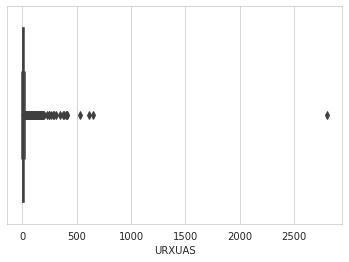

In [87]:
sns.boxplot(nhanes['URXUAS'])

In [83]:
def weighted_frequency(x,y):
    a = pd.Series(df[[x,y]].groupby(x).sum()[y])/df[y].sum()
    b = a.index.map(meta.variable_value_labels[x])
    c = a.values
    df_temp = pd.DataFrame({'Labels': b, 'Frequency': c})
    return df_temp